In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'E:\netData\SciSciNet\2000-2015\paper2000-2015.tsv.zip')

In [3]:
df

,PaperID,Year,FieldID,JournalID,Reference_Count,C_f,C5,Team_Size,Disruption,Atyp_10pct_Z,...,Tweet,NCT,Institution_Count,NIH_Count,NSF_Count,Volume,Issue,NIH,NSF,PageLength
0,2789336,2008,33923547,204851967,13,0.072363,1,2,-0.001927,5.500000,...,0,0,1,0,0,0,0,0,0,4
1,191292197,2003,162324750,85146435,7,0.615370,6,1,0.028249,23.854084,...,0,0,1,0,0,105,1257,0,0,14
2,204935239,2003,71924100,13978405,13,0.812368,12,1,0.000000,6.597039,...,0,0,1,0,0,178,9,0,0,0
3,254201335,2004,127413603,13624874,14,1.084080,3,2,-0.000400,57.706944,...,0,0,1,0,0,49,1,0,0,3
4,273108480,2015,162324750,160393188,24,4.363288,23,1,-0.001233,21.198999,...,0,0,1,0,0,37,37,0,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18737863,2410441973,2014,71924100,2755924294,40,1.279841,12,3,0.002320,0.480196,...,0,0,1,0,0,56,4,0,0,9
18737864,2411860195,2014,71924100,2755060417,3,0.196899,2,3,0.037736,54.016285,...,0,0,1,0,0,93,8,0,0,1
18737865,19283373,2007,144024400,2764989208,5,0.999786,6,1,0.000000,226.953674,...,0,0,1,0,0,89,327,0,0,7
18737866,2798896096,2006,33923547,35440848,27,2.924278,28,3,-0.001645,0.639332,...,0,0,3,0,1,24,3,0,1,44


In [4]:
df['NC'] = df['C_f']
df['CP'] = df['Patent_Count']
df['-10 Novelty'] = df['Atyp_10pct_Z']*(-1)
df['-M Novelty'] = df['Atyp_Median_Z']*(-1)

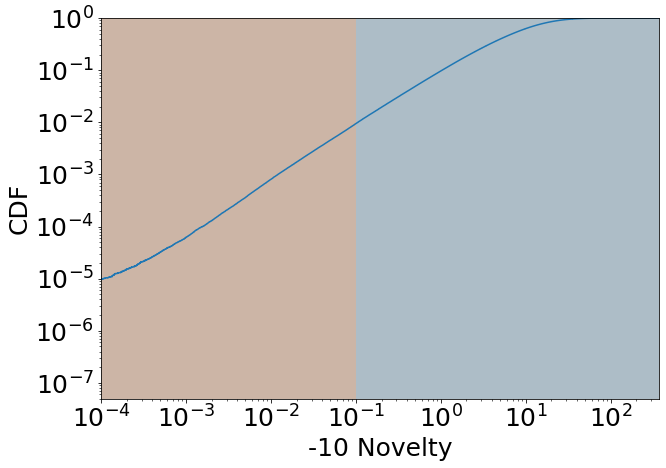

In [11]:
data = df['-10 Novelty'].values
data = data[data>0]
f, ax = plt.subplots(figsize=(10, 7))
# Plot the CDF curve
sns.ecdfplot(data=data)
ax.set_xscale("log")
ax.set_yscale("log")

plt.xlim((10e-5,max(data)))

plt.xlabel('-10 Novelty',fontsize = 25)
plt.ylabel('CDF',fontsize = 25)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)

# Show the plot
ax.axvspan(10e-5,10e-2, facecolor='#6E2C00', alpha=0.35)
ax.axvspan(10e-2,max(data), facecolor='#154360', alpha=0.35)
plt.savefig(r"G:\A J YANG PAPER\All paper analysis\JIF Unveiling Funded Research Novelty and Disruptive Potential\figs\fig 2\1.pdf",bbox_inches = 'tight')

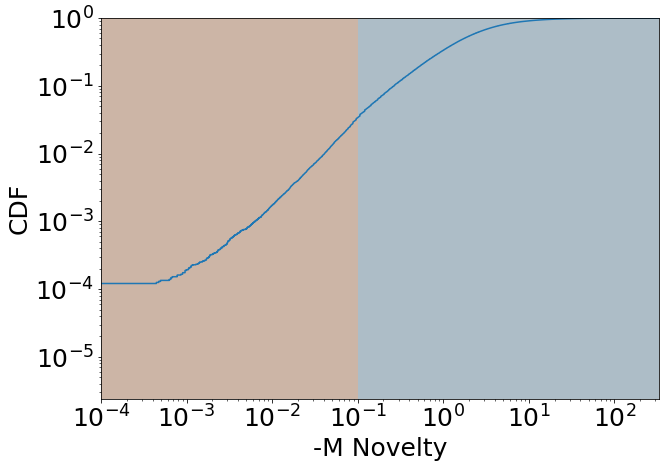

In [10]:
data = df['-M Novelty'].values
data = data[data>0]
f, ax = plt.subplots(figsize=(10, 7))
# Plot the CDF curve
sns.ecdfplot(data=data)
ax.set_xscale("log")
ax.set_yscale("log")

plt.xlim((10e-5,max(data)))

plt.xlabel('-M Novelty',fontsize = 25)
plt.ylabel('CDF',fontsize = 25)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)

# Show the plot
ax.axvspan(10e-5,10e-2, facecolor='#6E2C00', alpha=0.35)
ax.axvspan(10e-2,max(data), facecolor='#154360', alpha=0.35)
plt.savefig(r"G:\A J YANG PAPER\All paper analysis\JIF Unveiling Funded Research Novelty and Disruptive Potential\figs\fig 2\2.pdf",bbox_inches = 'tight')

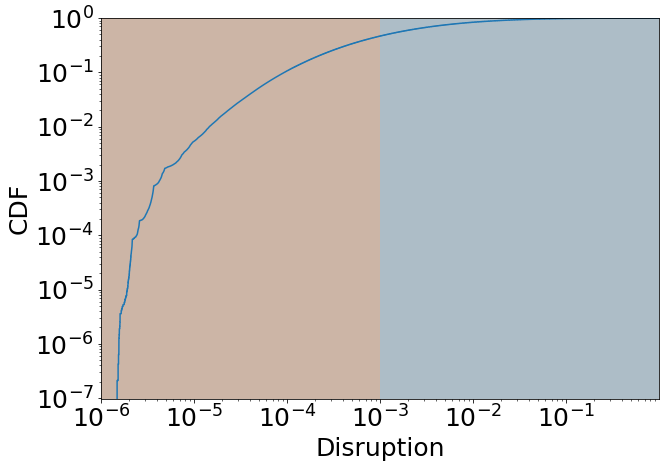

In [3]:
data = df['Disruption'].values
data = data[data>0]
f, ax = plt.subplots(figsize=(10, 7))
# Plot the CDF curve
sns.ecdfplot(data=data)
ax.set_xscale("log")
ax.set_yscale("log")

plt.xlim((10e-7,max(data)))

plt.xlabel('Disruption',fontsize = 25)
plt.ylabel('CDF',fontsize = 25)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)

# Show the plot
ax.axvspan(10e-7,10e-4, facecolor='#6E2C00', alpha=0.35)
ax.axvspan(10e-4,max(data), facecolor='#154360', alpha=0.35)
plt.savefig(r"G:\A J YANG PAPER\All paper analysis\JASIST Unveiling Funded Research Novelty and Disruptive Potential\figs\fig 2\3.pdf",bbox_inches = 'tight')